# Machine Learning

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

## Protein structures
+ Write a function that loads in the `x`, `y`, and `z` coordinates for all `CA` atoms from a pdb file.

In [4]:
def load_pdb(pdb_file):
    
    f = open(pdb_file,'r')
    lines = f.readlines()
    f.close()
    
    all_coord = []
    for l in lines:
        if l[0:4] == "ATOM" and l[13:16] == "CA ":
            coord = [float(l[(30 + i*8):(38 + i*8)]) for i in range(3)]
            all_coord.append(coord)
            
    return np.array(all_coord)

+ Load in the pdb files `homolog-1.pdb` and `homolog-2.pdb` into separate numpy arrays.

In [5]:
hm1 = load_pdb("homolog-1.pdb")
hm2 = load_pdb("homolog-2.pdb")

+ Plot `x` vs. `y` for the two proteins on the same graph.

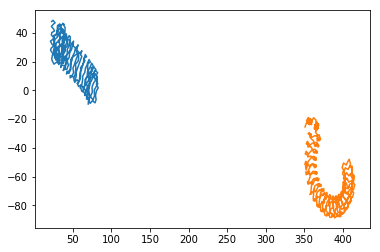

In [6]:
plt.plot(hm1[:,0],hm1[:,1])
plt.plot(hm2[:,0],hm2[:,1])

+ Perform a principle component analysis using `sklearn.decomposition.PCA` on each individual set of coordinates and then transform them individually onto their PCA axes.

In [7]:
pca1 = PCA(n_components=3)
pca1_fit = pca1.fit(hm1)
t_hm1 = pca1_fit.transform(hm1)

pca2 = PCA(n_components=3)
pca2_fit = pca2.fit(hm2)
t_hm2 = pca2_fit.transform(hm2)

+ Plot the transformed coordinates on top of one another.

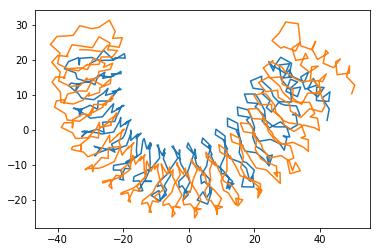

In [8]:
plt.plot(t_hm1[:,0],t_hm1[:,1])
plt.plot(t_hm2[:,0],t_hm2[:,1])

+ Can you explain the result?

## Worm Population

You are studying a mixed population of *C. elegans* worms and would like to figure out how many classes of worms are present.  You measure 10 different features (things like worm length, fecundity, etc.) for 50,000 individual.  You have a dataset in `pca_dataset.csv`, with the parameters in columns the top (numbered `0` to `9`) and the individuals in rows.  

+ Use a PCA analysis to decide how many worm classes you can discriminate. **NOTE: Make sure you exclude the worm number (leftmost column) from the analysis**

In [ ]:
import pandas

X = np.array(pandas.read_csv("pca_dataset.csv"))[:,1:]

ndim = 10
bound = 50
num_data_sets = 5 ### THEY WON'T KNOW THIS, but it makes it pretty


pca = PCA(n_components=10)
pca_fit = pca.fit(X)
Q = pca_fit.transform(X)

a = X.shape[0]/num_data_sets
for i in range(X.shape[1]):
    plt.plot(X[(i*a):((i+1)*a),3],
             X[(i*a):((i+1)*a),4],"o")
plt.xlim((-bound,bound))
plt.ylim((-bound,bound))
plt.show()

for i in range(Q.shape[1]):
    plt.plot(Q[(i*a):((i+1)*a),0],
             Q[(i*a):((i+1)*a),1],"o")
plt.xlim((-bound,bound))
plt.ylim((-bound,bound))
plt.show()

+ How many principle components do you have to look at to capture 90% of the variation in the worm features?

In [ ]:
pca_fit.explained_variance_ratio_

+ You measure the features of a new worm that was sent to the lab.  It's feature set is below.  Does this worm belong to one of your classes?  If so, which one?

In [ ]:
new_worm = [  3.6515213, -4.08529885, -6.88944367, 14.65016314, -11.77903051,
              0.8635548, -6.81508493, -5.45759634, 10.27459884, -5.07160515]

In [ ]:
for i in range(Q.shape[1]):
    plt.plot(Q[(i*a):((i+1)*a),0],
             Q[(i*a):((i+1)*a),1],"o")
    
new_col = pca_fit.transform(new_worm)
print(new_col)
plt.plot(new_col[0,0],new_col[0,1],"+",color="yellow")
    
plt.xlim((-bound,bound))
plt.ylim((-bound,bound))
plt.show()

###  Generate Worm Population

In [ ]:
import scipy.ndimage

def gen_samples(ndim=10,nsam=10000,num_data_sets=4,scale=5):
    
    out = []
    for i in range(num_data_sets):
        cov = np.abs(np.random.randn(ndim,ndim))
        np.fill_diagonal(cov,0.0)
        cov = scipy.ndimage.interpolation.rotate(cov,angle=180*np.random.random(),
                                                 reshape=False,mode='reflect')
    
        out.append(np.dot(np.random.normal(size=(nsam,cov.shape[0])),cov) + np.random.normal(size=ndim)*scale)
    return np.concatenate(out)


ndim = 10
num_data_sets = 5
scale = 10
bound = 50

X = gen_samples(ndim=ndim,num_data_sets=num_data_sets,scale=scale)

import pandas
y = pandas.DataFrame(X)
y.to_csv("junk.csv")

### Generate random worm

In [ ]:
f = open("pca_dataset.csv")
lines = f.readlines()
f.close()

to_take = int(np.random.random()*50000)
col = np.array([float(c) for c in lines[to_take].split(",")[1:]])
print(col)